<a href="https://colab.research.google.com/github/mintusf/CIFAR/blob/master/Encoder_Adam_84%25_1111__17_41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows implementation of autoencoder with another CNN.

First, let's download data from Google Drive.

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/open?id=19b0kUvuPGl6U4Cj4VgTfYTc7gK5VgA09'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Train_X')

link = 'https://drive.google.com/open?id=1ejj9Qt4Ah9IOSmKnM87-oGe-IytAxM2F'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Train_Y')

link = 'https://drive.google.com/open?id=1KzllioQ321D7zAHlmasN-tagGcE6pCnC'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Dev_X')

link = 'https://drive.google.com/open?id=1m3E519AgJkPbsTNGvEwSHCN6otXNB1Y0'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Dev_Y')

link = 'https://drive.google.com/open?id=10mFBsqasbIcrbLrWqqkMyw41OczlcYID'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Test_X')

link = 'https://drive.google.com/open?id=1r3zB1bwH6ZjrLZjQftaqHAr-9wGra3Uj'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Test_Y')

link = 'https://drive.google.com/open?id=1B3YZrKYnxvAQmC-I6i8vm998qP5izhbA'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Dev_X_original')

link = 'https://drive.google.com/open?id=1mxKxn8s1qMCoX9mvBAd-0wCUKQUSVZ2p'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Dev_Y_original')

link = 'https://drive.google.com/open?id=1z2TFC3cFLsN7qQcg86ILb2Gv4lXUM19m'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Test_X_original')

link = 'https://drive.google.com/open?id=1TL3GJFCvwxwK5DqqZhTveb_jKmPS0AiK'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Test_Y_original')

link = 'https://drive.google.com/open?id=1Fa_uK2z1fpL6GyRosGQvtFx5eYjz7IdJ'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Train_X_augmented')

link = 'https://drive.google.com/open?id=170pj5QRqB4RlxakUaZZ5PXjD1cAu_ItV'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Train_Y_augmented')

19b0kUvuPGl6U4Cj4VgTfYTc7gK5VgA09
1ejj9Qt4Ah9IOSmKnM87-oGe-IytAxM2F
1KzllioQ321D7zAHlmasN-tagGcE6pCnC
1m3E519AgJkPbsTNGvEwSHCN6otXNB1Y0
10mFBsqasbIcrbLrWqqkMyw41OczlcYID
1r3zB1bwH6ZjrLZjQftaqHAr-9wGra3Uj
1B3YZrKYnxvAQmC-I6i8vm998qP5izhbA
1mxKxn8s1qMCoX9mvBAd-0wCUKQUSVZ2p
1z2TFC3cFLsN7qQcg86ILb2Gv4lXUM19m
1TL3GJFCvwxwK5DqqZhTveb_jKmPS0AiK
1Fa_uK2z1fpL6GyRosGQvtFx5eYjz7IdJ
170pj5QRqB4RlxakUaZZ5PXjD1cAu_ItV


Let's download needed libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

Now, let's read downloaded filed into dataset variables.

In [3]:
X_train = np.load('Train_X')/255.
Y_train_1d = np.load('Train_Y')
X_dev = np.load('Dev_X')/255.
Y_dev_1d = np.load('Dev_Y')
X_test = np.load('Test_X')/255.
Y_test_1d = np.load('Test_Y')
X_dev_original = np.load('Dev_X_original')/255.
Y_dev_original_1d = np.load('Dev_Y_original')
X_test_original = np.load('Test_X_original')/255.
Y_test_original_1d = np.load('Test_Y_original')
X_train_augmented = np.load('Train_X_augmented')/255.
Y_train_augmented_1d = np.load('Train_Y_augmented')
(X_train_original, Y_train_original_1d), _ = cifar10.load_data()
X_train_original = X_train_original/255.
Y_train = np.eye(10)[Y_train_1d.reshape(-1)]

170500096/170498071 [==============================] - 6s 0us/step


Next, let's check their shapes

In [4]:
print(Y_train.shape)
Y_dev = np.eye(10)[Y_dev_1d.reshape(-1)]
print(Y_dev.shape)
Y_test = np.eye(10)[Y_test_1d.reshape(-1)]
print(Y_test.shape)
Y_dev_original = np.eye(10)[Y_dev_original_1d.reshape(-1)]
print(Y_dev_original.shape)
Y_train_augmented = np.eye(10)[Y_train_augmented_1d.reshape(-1)]
print(Y_train_augmented.shape)
Y_train_original = np.eye(10)[Y_train_original_1d.reshape(-1)]
print(Y_train_original.shape)


(42500, 10)
(8750, 10)
(8750, 10)
(5000, 10)
(50000, 10)
(50000, 10)


"Train" dataset is dataset used in this script with missing 50% of three classes.
"Dev"

Labels

In [0]:
names = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Let' import libraries for model building

In [0]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout,UpSampling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model

Now, let's build the model of autoencoder.

In [0]:
def Autoencoder (input_img):

    x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv1_encoder')(input_img)  # 32x32x64
    x = BatchNormalization(name = 'BN0')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv2_encoder')(x)# 32x32x64
    x = BatchNormalization(name = 'BN1')(x)
    x = MaxPooling2D((2,2),name = 'MP1')(x)# 16x16x64
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name = 'Conv3_encoder')(x)# 16x16x128
    x = BatchNormalization(name = 'BN2')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name = 'Conv4_encoder')(x)# 16x16x128
    x = BatchNormalization(name = 'BN3')(x)
    x = MaxPooling2D((2, 2), padding='same',name = 'MP2')(x)# 8x8x128
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name = 'Conv5_encoder')(x)# 8x8x256
    x = BatchNormalization(name = 'BN4')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name = 'Conv6_encoder')(x)# 8x8x256
    x = BatchNormalization(name = 'Encoded')(x)
    encoded = x

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name = 'Conv6_decoder')(encoded)
    x = BatchNormalization(name = 'BN6')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name = 'Conv5_decoder')(x)
    x = BatchNormalization(name = 'BN7')(x)
    x = UpSampling2D((2,2),name = 'US1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name = 'Conv4_decoder')(x)
    x = BatchNormalization(name = 'BN8')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name = 'Conv3_decoder')(x)
    x = BatchNormalization(name = 'BN9')(x)
    x = UpSampling2D((2,2),name = 'US2')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv2_decoder')(x)
    x = BatchNormalization(name = 'BN10')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv1_decoder')(x)
    x = BatchNormalization(name = 'BN11')(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same', name = 'Output')(x)

    return (encoded, decoded)

In [12]:
input_img = Input(shape = (32,32,3))
model_autoenc = Model(input_img,Autoencoder(input_img)[1],name = 'Autoencoder')
Adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_autoenc.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model_autoenc.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_encoder (Conv2D)       (None, 32, 32, 64)        1792      
_________________________________________________________________
BN0 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
Conv2_encoder (Conv2D)       (None, 32, 32, 64)        36928     
_________________________________________________________________
BN1 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
MP1 (MaxPooling2D)           (None, 16, 16, 64)        0         
________________________________________

Now let's train the autoencoder.

In [0]:
with tf.device('/device:GPU:0'):
  history = model_autoenc.fit(X_train_augmented, X_train_augmented, validation_data=(X_dev_original, X_dev_original), epochs = 50, batch_size = 256,verbose = 2)

Train on 50000 samples, validate on 5000 samples
Epoch 1/50
50000/50000 - 26s - loss: 0.0105 - acc: 0.6482 - val_loss: 0.0498 - val_acc: 0.4678
Epoch 2/50
50000/50000 - 21s - loss: 0.0043 - acc: 0.7546 - val_loss: 0.0179 - val_acc: 0.6188
Epoch 3/50
50000/50000 - 21s - loss: 0.0032 - acc: 0.7779 - val_loss: 0.0035 - val_acc: 0.7714
Epoch 4/50
50000/50000 - 21s - loss: 0.0027 - acc: 0.7900 - val_loss: 0.0043 - val_acc: 0.7883
Epoch 5/50
50000/50000 - 21s - loss: 0.0024 - acc: 0.7979 - val_loss: 0.0038 - val_acc: 0.8013
Epoch 6/50
50000/50000 - 21s - loss: 0.0021 - acc: 0.8076 - val_loss: 0.0028 - val_acc: 0.8047
Epoch 7/50
50000/50000 - 21s - loss: 0.0020 - acc: 0.8089 - val_loss: 0.0064 - val_acc: 0.7818
Epoch 8/50
50000/50000 - 21s - loss: 0.0017 - acc: 0.8172 - val_loss: 0.0032 - val_acc: 0.8142
Epoch 9/50
50000/50000 - 21s - loss: 0.0016 - acc: 0.8229 - val_loss: 0.0030 - val_acc: 0.8013
Epoch 10/50
50000/50000 - 21s - loss: 0.0015 - acc: 0.8241 - val_loss: 0.0021 - val_acc: 0.8139


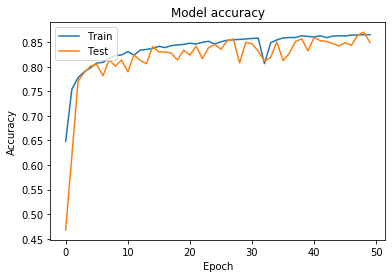

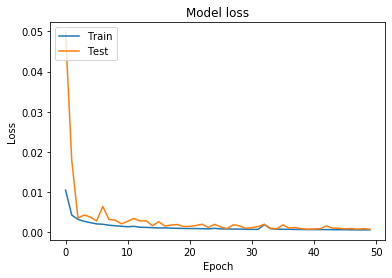

In [0]:
import matplotlib.pyplot as plt

#figure,ax = plt.subplots(figsize = (10,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Let's save the model and weights.

In [0]:
# create on Colab directory
model_autoenc.save('Autoencoder.h5')    
model_file = drive.CreateFile({'title' : 'Autoencoder.h5'})
model_file.SetContentFile('Autoencoder.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})


model_autoenc.save_weights('Autoencoder_weights.h5')
weights_file = drive.CreateFile({'title' : 'Autoencoder_weights.h5'})
weights_file.SetContentFile('Autoencoder_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1uQ4fMOlGQeXj-Wh7az6bixJcFJAymez0'})

NEW, GET WEIGHTS

In [0]:
last_weight_file = drive.CreateFile({'id': '1uQ4fMOlGQeXj-Wh7az6bixJcFJAymez0'}) 
last_weight_file.GetContentFile('last_weights.mat')
model_autoenc.load_weights('last_weights.mat')

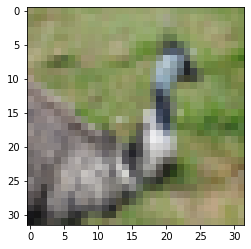

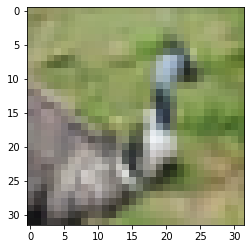

In [15]:
import matplotlib.pyplot as plt
#model_autoenc.save_weights('autoencoder.h5')
model_autoenc.get_weights()[0][1][1][1]
decoded = model_autoenc.predict(np.reshape(X_test[5],(-1,32,32,3)))
plt.imshow(X_test[5])
plt.show()
plt.imshow(decoded[0])

NEEEEW, deleted after running

In [0]:
def build_model(encoded,weight_decay,num_classes,dropout):
      # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

      X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(encoded)
      X = BatchNormalization()(X)
      X = Activation('relu')(X)
      X = Dropout(dropout)(X)

      X = MaxPooling2D(pool_size=(2, 2))(X)

      X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
      X = BatchNormalization()(X)
      X = Activation('relu')(X)  
      X = Dropout(dropout)(X)

      X = MaxPooling2D(pool_size=(2, 2))(X)

      X = Flatten()(X)
      X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
      X = BatchNormalization()(X)
      X = Activation('relu')(X)  
      X = Dropout(dropout)(X)

      X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
      X = BatchNormalization()(X)
      X = Activation('relu')(X)  
      X = Dropout(dropout)(X)

      X = Dense(num_classes)(X)
      X = Activation('softmax')(X)
      
      return X

def plot_history(history):
    plt.plot(self.history.history['acc'])
    plt.plot(self.history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(self.history.history['loss'])
    plt.plot(self.history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def train(model_classifier,learning_rate,x_train,y_train):

    #training parameters
    batch_size = 256
    maxepoches = 40
    learning_rate = learning_rate
    lr_decay = 1e-6
    lr_drop = 20
    def lr_scheduler(epoch):
        return learning_rate * (0.5 ** (epoch // lr_drop))
    reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

    #data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        zoom_range=0.1,
        shear_range=0.1,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)



    #optimization details
    sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
    adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    mask = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
    mask = np.reshape(mask,(10,1))
    def customLoss(yTrue,yPred):
      print(yTrue.shape)
      return K.categorical_crossentropy(mask*yTrue, yPred, from_logits=False, axis=-1)
    #model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
    model_classifier.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

    # training process in a for loop with learning rate drop every 25 epoches.

    class_weight = {0: 1.,1: 1.,2: 3.,3: 4.,4: 2.,5: 3.,6: 1.,7: 1.,8: 1.,9: 1.}

    history = model_classifier.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=maxepoches,
                        validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)
    
    #history = model_classifier.fit(x_train,y_train, batch_size=batch_size,epochs=maxepoches,validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)

    model_classifier.save_weights('cifar10vgg.h5')


    return model_classifier, history


def build_and_train(learning_rate,x_train,y_train,load_weights=True, dropout = 0.1, weights_id = None):
    num_classes = 10
    weight_decay = 0
    x_shape = [32,32,3]
    encoded = Autoencoder(input_img)[0] #using encoder
    model = Model(input_img,build_model(encoded,weight_decay,num_classes,dropout))
    for l1,l2 in zip(model.layers[:15],model_autoenc.layers[:15]):#getting weights from encoder
      l1.set_weights(l2.get_weights())
    #print(model_autoenc.get_weights()[0][1][1])
    #print(self.model.get_weights()[0][1][1])
    for layer in model.layers[0:15]:
      layer.trainable = False
    if load_weights:
      last_weight_file = drive.CreateFile({'id': weights_id}) 
      last_weight_file.GetContentFile('last_weights.mat')
      model.load_weights('last_weights.mat')
    model.summary()
    model,history = train(model,learning_rate,x_train,y_train)
    return model,history



In [42]:
x_test = X_dev_original
y_test = Y_dev_original
x_train = X_train
y_train = Y_train
with tf.device('/device:GPU:0'):
  weights_id = '19YMrQZyvfZzzIUKgSBDsmN_ls0GgnbiK'
  model_classifier,history = build_and_train(0.1,x_train,y_train, dropout = 0.15, weights_id = weights_id)


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_encoder (Conv2D)       (None, 32, 32, 64)        1792      
_________________________________________________________________
BN0 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
Conv2_encoder (Conv2D)       (None, 32, 32, 64)        36928     
_________________________________________________________________
BN1 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
MP1 (MaxPooling2D)           (None, 16, 16, 64)        0         
_________________________________________________________________
Conv3_encoder (Conv2D)       (None, 16, 16, 128)       7385

KeyboardInterrupt: ignored

In [23]:
# create on Colab directory
model_classifier.model.save('Full5.h5')    
model_file = drive.CreateFile({'title' : 'Full5.h5'})
model_file.SetContentFile('Full5.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})
print(model_file.get('id'))


model_classifier.model.save_weights('Full5_weights.h5')
weights_file = drive.CreateFile({'title' : 'Full5_weights.h5'})
weights_file.SetContentFile('Full5_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})
print(weights_file.get('id'))

1hpwe6mTzqQ0QnRASzpitmlu3PzkP__6L
19YMrQZyvfZzzIUKgSBDsmN_ls0GgnbiK


(5000,)
(5000,)
[False  True  True ...  True  True  True]
(899, 32, 32, 3)


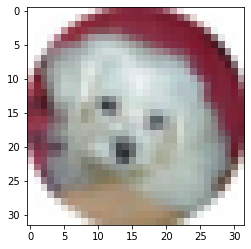

Class: dog
Predicted: cat


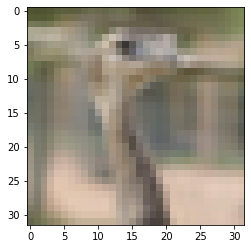

Class: bird
Predicted: deer


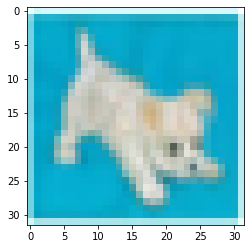

Class: dog
Predicted: cat


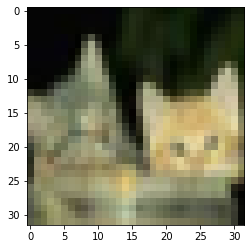

Class: cat
Predicted: deer


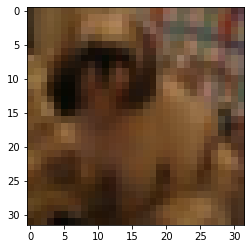

Class: dog
Predicted: cat
The number of mistaken airplanes is: 42
The number of mistaken automobiles is: 46
The number of mistaken birds is: 183
The number of mistaken cats is: 190
The number of mistaken deers is: 77
The number of mistaken dogs is: 109
The number of mistaken frogs is: 52
The number of mistaken horses is: 58
The number of mistaken ships is: 53
The number of mistaken trucks is: 89


In [24]:
import tensorflow.keras.backend as K
predictions = np.argmax(model_classifier.model.predict(x_test),axis = 1)
labels = np.argmax(y_test,axis = 1)
print(predictions.shape)
print(labels.shape)
print(np.equal(predictions,labels))
mistaken = x_test[np.not_equal(predictions,labels)]
new_labels = labels[np.not_equal(predictions,labels)]
new_predictions = predictions [np.not_equal(predictions,labels)]
print(mistaken.shape)

for i in range(5):
  plt.imshow(mistaken[i,:,:,:])
  plt.show()
  print("Class: "+names[new_labels[i]])
  print("Predicted: "+names[new_predictions[i]])

for i in range(10):
  count = np.sum(new_labels==i)
  print("The number of mistaken "+ names[i] + "s is: "+ str(count))

OLD FROM NOW ON

Let's add model

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers
#from tensorflow.keras import backend as K
#from tensorflow.keras import regularizers

In [0]:
with tf.device('/device:GPU:0'):

  class cifar10vgg:
      def __init__(self,learning_rate,x_train,y_train,train=True):
          self.num_classes = 10
          self.weight_decay = 0
          self.x_shape = [32,32,3]
          encoded = Autoencoder(input_img)[0] #using encoder
          self.model = Model(input_img,self.build_model(encoded))
          for l1,l2 in zip(self.model.layers[:15],model_autoenc.layers[:15]):#getting weights from encoder
            l1.set_weights(l2.get_weights())
          #print(model_autoenc.get_weights()[0][1][1])
          #print(self.model.get_weights()[0][1][1])
          for layer in self.model.layers[0:15]:
            layer.trainable = False
          if train:
              self.model.summary()
              self.model = self.train(self.model,learning_rate,x_train,y_train)
          else:
              self.model.load_weights('cifar10vgg.h5')


      def build_model(self,encoded):
          # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

          weight_decay = self.weight_decay

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(encoded)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)
          X = Dropout(0.2)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.2)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Flatten()(X)
          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.2)(X)

          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.2)(X)

          X = Dense(self.num_classes)(X)
          X = Activation('softmax')(X)
          
          return X

      def predict(self,x,normalize=True,batch_size=50):
          if normalize:
              x = self.normalize_production(x)
          return self.model.predict(x,batch_size)

      def train(self,model_classifier,learning_rate,x_train,y_train):

          #training parameters
          batch_size = 128
          maxepoches = 100
          learning_rate = learning_rate
          lr_decay = 1e-7
          lr_drop = 20
          def lr_scheduler(epoch):
              return learning_rate * (0.5 ** (epoch // lr_drop))
          reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

          #data augmentation
          datagen = ImageDataGenerator(
              featurewise_center=False,  # set input mean to 0 over the dataset
              samplewise_center=False,  # set each sample mean to 0
              featurewise_std_normalization=False,  # divide inputs by std of the dataset
              samplewise_std_normalization=False,  # divide each input by its std
              zca_whitening=False,  # apply ZCA whitening
              rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
              height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
              zoom_range=0.1,
              shear_range=0.1,
              horizontal_flip=True,  # randomly flip images
              vertical_flip=False)  # randomly flip images
          # (std, mean, and principal components if ZCA whitening is applied).
          datagen.fit(x_train)



          #optimization details
          sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)

          mask = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
          mask = np.reshape(mask,(10,1))
          def customLoss(yTrue,yPred):
            print(yTrue.shape)
            return K.categorical_crossentropy(mask*yTrue, yPred, from_logits=False, axis=-1)
          #model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
          model_classifier.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

          # training process in a for loop with learning rate drop every 25 epoches.

          class_weight = {0: 1.,1: 1.,2: 2.,3: 2.,4: 2.,5: 1.,6: 1.,7: 1.,8: 1.,9: 1.}

          self.history = model_classifier.fit_generator(datagen.flow(x_train, y_train,
                                          batch_size=batch_size),
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              epochs=maxepoches,
                              validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)
          
          #history = model_classifier.fit(x_train,y_train, batch_size=batch_size,epochs=maxepoches,validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)

          model_classifier.save_weights('cifar10vgg.h5')
          
          plt.plot(self.history.history['acc'])
          plt.plot(self.history.history['val_acc'])
          plt.title('Model accuracy')
          plt.ylabel('Accuracy')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          # Plot training & validation loss values
          plt.plot(self.history.history['loss'])
          plt.plot(self.history.history['val_loss'])
          plt.title('Model loss')
          plt.ylabel('Loss')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          return model_classifier

Choose datasets

In [0]:
x_test = X_dev_original
y_test = Y_dev_original
x_train = X_train
y_train = Y_train

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_encoder (Conv2D)       (None, 32, 32, 64)        1792      
_________________________________________________________________
BN0 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
Conv2_encoder (Conv2D)       (None, 32, 32, 64)        36928     
_________________________________________________________________
BN1 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
MP1 (MaxPooling2D)           (None, 16, 16, 64)        0         
_________________________________________________________________
Conv3_encoder (Conv2D)       (None, 16, 16, 128)       73856 

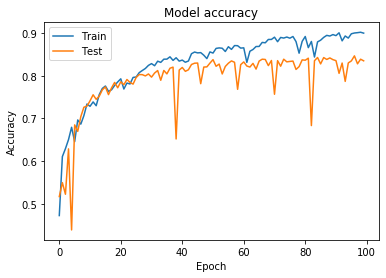

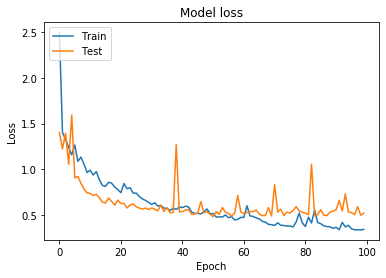

AttributeError: ignored

In [0]:
with tf.device('/device:GPU:0'):
  model_classifier = cifar10vgg(0.1,x_train,y_train)


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# create on Colab directory
model_classifier.model.save('Full1.h5')    
model_file = drive.CreateFile({'title' : 'Full1.h5'})
model_file.SetContentFile('Full1.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})


model_classifier.model.save_weights('Full1_weights.h5')
weights_file = drive.CreateFile({'title' : 'Full1_weights.h5'})
weights_file.SetContentFile('Full1_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1ie6ztH4qx3EuHM-NMJj-GvJl5DkVOrpj'})

(5000,)
(5000,)
[False  True  True ...  True False  True]
(824, 32, 32, 3)


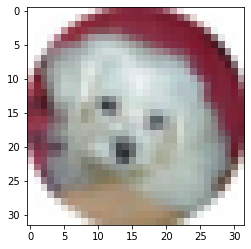

Class: dog
Predicted: cat


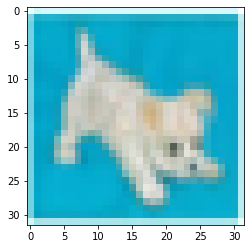

Class: dog
Predicted: horse


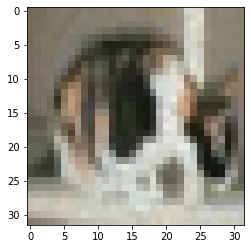

Class: cat
Predicted: dog


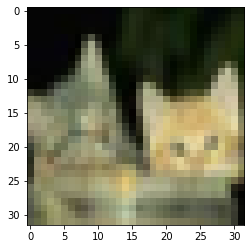

Class: cat
Predicted: horse


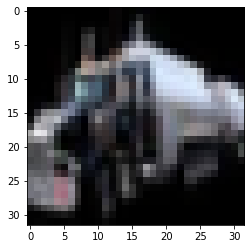

Class: truck
Predicted: horse
The number of mistaken airplanes is: 43
The number of mistaken automobiles is: 35
The number of mistaken birds is: 131
The number of mistaken cats is: 198
The number of mistaken deers is: 96
The number of mistaken dogs is: 141
The number of mistaken frogs is: 38
The number of mistaken horses is: 37
The number of mistaken ships is: 49
The number of mistaken trucks is: 56


In [0]:
import tensorflow.keras.backend as K
predictions = np.argmax(model_classifier.model.predict(x_test),axis = 1)
labels = np.argmax(y_test,axis = 1)
print(predictions.shape)
print(labels.shape)
print(np.equal(predictions,labels))
mistaken = x_test[np.not_equal(predictions,labels)]
new_labels = labels[np.not_equal(predictions,labels)]
new_predictions = predictions [np.not_equal(predictions,labels)]
print(mistaken.shape)

for i in range(5):
  plt.imshow(mistaken[i,:,:,:])
  plt.show()
  print("Class: "+names[new_labels[i]])
  print("Predicted: "+names[new_predictions[i]])

for i in range(10):
  count = np.sum(new_labels==i)
  print("The number of mistaken "+ names[i] + "s is: "+ str(count))

We can see that biggest problems for the network were images of birds, cats, deers and dogs. It makes sense since first three were undersampled classes and dogs are very similar to cats. Let's try to increase weights of these classes in the cost function

In [0]:
with tf.device('/device:GPU:0'):

  class cifar10vgg:
      def __init__(self,learning_rate,x_train,y_train,train=True):
          self.num_classes = 10
          self.weight_decay = 0
          self.x_shape = [32,32,3]
          encoded = Autoencoder(input_img)[0] #using encoder
          self.model = Model(input_img,self.build_model(encoded))
          for l1,l2 in zip(self.model.layers[:15],model_autoenc.layers[:15]):#getting weights from encoder
            l1.set_weights(l2.get_weights())
          #print(model_autoenc.get_weights()[0][1][1])
          #print(self.model.get_weights()[0][1][1])
          for layer in self.model.layers[0:15]:
            layer.trainable = False
          if train:
              self.model.summary()
              self.model = self.train(self.model,learning_rate,x_train,y_train)
          else:
              self.model.load_weights('cifar10vgg.h5')


      def build_model(self,encoded):
          # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

          weight_decay = self.weight_decay

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(encoded)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)
          X = Dropout(0.2)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.2)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Flatten()(X)
          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.2)(X)

          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.2)(X)

          X = Dense(self.num_classes)(X)
          X = Activation('softmax')(X)
          
          return X

      def predict(self,x,normalize=True,batch_size=50):
          if normalize:
              x = self.normalize_production(x)
          return self.model.predict(x,batch_size)

      def train(self,model_classifier,learning_rate,x_train,y_train):

          #training parameters
          batch_size = 128
          maxepoches = 100
          learning_rate = learning_rate
          lr_decay = 1e-7
          lr_drop = 20
          def lr_scheduler(epoch):
              return learning_rate * (0.5 ** (epoch // lr_drop))
          reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

          #data augmentation
          datagen = ImageDataGenerator(
              featurewise_center=False,  # set input mean to 0 over the dataset
              samplewise_center=False,  # set each sample mean to 0
              featurewise_std_normalization=False,  # divide inputs by std of the dataset
              samplewise_std_normalization=False,  # divide each input by its std
              zca_whitening=False,  # apply ZCA whitening
              rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
              height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
              zoom_range=0.1,
              shear_range=0.1,
              horizontal_flip=True,  # randomly flip images
              vertical_flip=False)  # randomly flip images
          # (std, mean, and principal components if ZCA whitening is applied).
          datagen.fit(x_train)



          #optimization details
          sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)

          mask = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
          mask = np.reshape(mask,(10,1))
          def customLoss(yTrue,yPred):
            print(yTrue.shape)
            return K.categorical_crossentropy(mask*yTrue, yPred, from_logits=False, axis=-1)
          #model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
          model_classifier.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

          # training process in a for loop with learning rate drop every 25 epoches.

          class_weight = {0: 1.,1: 1.,2: 3.,3: 4.,4: 2.,5: 3.,6: 1.,7: 1.,8: 1.,9: 1.}

          self.history = model_classifier.fit_generator(datagen.flow(x_train, y_train,
                                          batch_size=batch_size),
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              epochs=maxepoches,
                              validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)
          
          #history = model_classifier.fit(x_train,y_train, batch_size=batch_size,epochs=maxepoches,validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)

          model_classifier.save_weights('cifar10vgg.h5')
          
          plt.plot(self.history.history['acc'])
          plt.plot(self.history.history['val_acc'])
          plt.title('Model accuracy')
          plt.ylabel('Accuracy')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          # Plot training & validation loss values
          plt.plot(self.history.history['loss'])
          plt.plot(self.history.history['val_loss'])
          plt.title('Model loss')
          plt.ylabel('Loss')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          return model_classifier

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_encoder (Conv2D)       (None, 32, 32, 64)        1792      
_________________________________________________________________
BN0 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
Conv2_encoder (Conv2D)       (None, 32, 32, 64)        36928     
_________________________________________________________________
BN1 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
MP1 (MaxPooling2D)           (None, 16, 16, 64)        0         
_________________________________________________________________
Conv3_encoder (Conv2D)       (None, 16, 16, 128)       7385

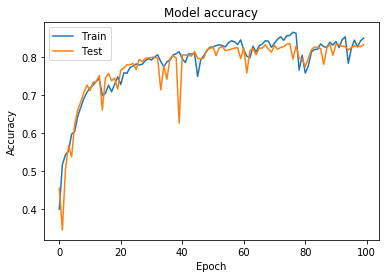

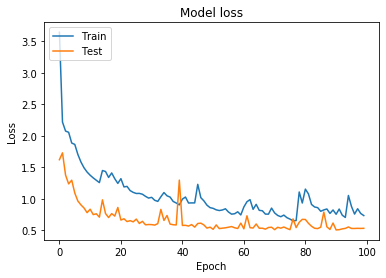

In [0]:
with tf.device('/device:GPU:0'):
  model_classifier3 = cifar10vgg(0.1,x_train,y_train)

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# create on Colab directory
model_classifier3.model.save('Proportional_cost_high_bias.h5')    
model_file = drive.CreateFile({'title' : 'Proportional_cost_high_bias.h5'})
model_file.SetContentFile('Proportional_cost_high_bias.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})


model_classifier3.model.save_weights('Proportional_cost_high_bias_weights.h5')
weights_file = drive.CreateFile({'title' : 'Proportional_cost_high_bias_weights.h5'})
weights_file.SetContentFile('Proportional_cost_high_bias_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1KynYkt0Hof2C_5Ss0m3qQpiz7PQX2syB'})

(5000,)
(5000,)
[False  True  True ...  True False  True]
(841, 32, 32, 3)


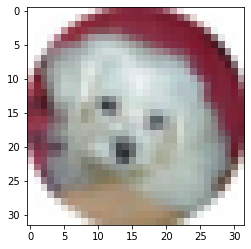

Class: dog
Predicted: cat


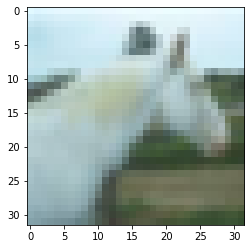

Class: horse
Predicted: airplane


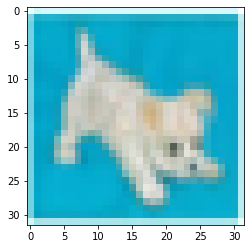

Class: dog
Predicted: cat


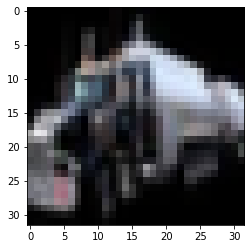

Class: truck
Predicted: automobile


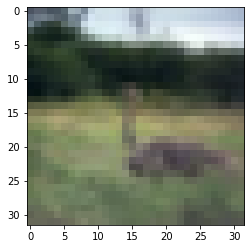

Class: bird
Predicted: deer


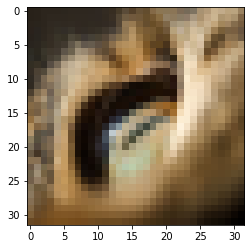

Class: cat
Predicted: deer


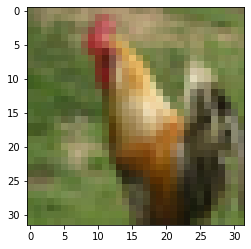

Class: bird
Predicted: deer


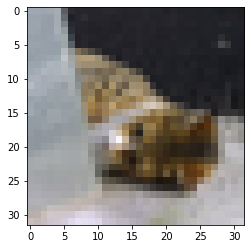

Class: cat
Predicted: dog


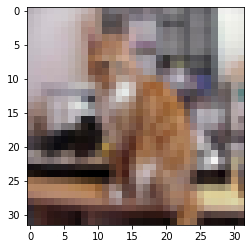

Class: cat
Predicted: truck


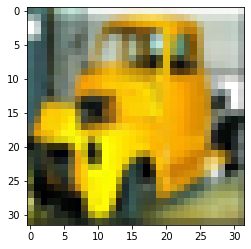

Class: truck
Predicted: automobile
The number of mistaken airplanes is: 33
The number of mistaken automobiles is: 23
The number of mistaken birds is: 107
The number of mistaken cats is: 212
The number of mistaken deers is: 107
The number of mistaken dogs is: 96
The number of mistaken frogs is: 49
The number of mistaken horses is: 69
The number of mistaken ships is: 62
The number of mistaken trucks is: 83


In [0]:
import tensorflow.keras.backend as K
predictions = np.argmax(model_classifier3.model.predict(x_test),axis = 1)
labels = np.argmax(y_test,axis = 1)
print(predictions.shape)
print(labels.shape)
print(np.equal(predictions,labels))
mistaken = x_test[np.not_equal(predictions,labels)]
new_labels = labels[np.not_equal(predictions,labels)]
new_predictions = predictions [np.not_equal(predictions,labels)]
print(mistaken.shape)

for i in range(10):
  plt.imshow(mistaken[i,:,:,:])
  plt.show()
  print("Class: "+names[new_labels[i]])
  print("Predicted: "+names[new_predictions[i]])

for i in range(10):
  count = np.sum(new_labels==i)
  print("The number of mistaken "+ names[i] + "s is: "+ str(count))

We can see that this time there is no variance, however bias increased. To decrease bias, I will decrease dropout value to 0.1. In order to decrease fluctuations of loss function, I will increase batch size to 256. It is ok to change both parameters since we know that they will improve training of network. Moreover, increased batch size will decrease increased variance effect of dropout reduction. We can also expect slower learning time due to larger batch size. The last thing that I will change is optimizer. In order to decrease oscillations, I will use Adam optimizer which includes RMSprop algorithm which decreases oscillations. It will increase a bit training time but it is worth it.

In [0]:
with tf.device('/device:GPU:0'):

  class cifar10vgg:
      def __init__(self,learning_rate,x_train,y_train,train=True):
          self.num_classes = 10
          self.weight_decay = 0
          self.x_shape = [32,32,3]
          encoded = Autoencoder(input_img)[0] #using encoder
          self.model = Model(input_img,self.build_model(encoded))
          for l1,l2 in zip(self.model.layers[:15],model_autoenc.layers[:15]):#getting weights from encoder
            l1.set_weights(l2.get_weights())
          #print(model_autoenc.get_weights()[0][1][1])
          #print(self.model.get_weights()[0][1][1])
          for layer in self.model.layers[0:15]:
            layer.trainable = False
          if train:
              self.model.summary()
              self.model = self.train(self.model,learning_rate,x_train,y_train)
          else:
              self.model.load_weights('cifar10vgg.h5')


      def build_model(self,encoded):
          # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

          weight_decay = self.weight_decay

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(encoded)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)
          X = Dropout(0.1)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.1)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Flatten()(X)
          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.1)(X)

          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.1)(X)

          X = Dense(self.num_classes)(X)
          X = Activation('softmax')(X)
          
          return X

      def predict(self,x,normalize=True,batch_size=50):
          if normalize:
              x = self.normalize_production(x)
          return self.model.predict(x,batch_size)

      def train(self,model_classifier,learning_rate,x_train,y_train):

          #training parameters
          batch_size = 256
          maxepoches = 100
          learning_rate = learning_rate
          lr_decay = 1e-6
          lr_drop = 20
          def lr_scheduler(epoch):
              return learning_rate * (0.5 ** (epoch // lr_drop))
          reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

          #data augmentation
          datagen = ImageDataGenerator(
              featurewise_center=False,  # set input mean to 0 over the dataset
              samplewise_center=False,  # set each sample mean to 0
              featurewise_std_normalization=False,  # divide inputs by std of the dataset
              samplewise_std_normalization=False,  # divide each input by its std
              zca_whitening=False,  # apply ZCA whitening
              rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
              height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
              zoom_range=0.1,
              shear_range=0.1,
              horizontal_flip=True,  # randomly flip images
              vertical_flip=False)  # randomly flip images
          # (std, mean, and principal components if ZCA whitening is applied).
          datagen.fit(x_train)



          #optimization details
          sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)

          mask = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
          mask = np.reshape(mask,(10,1))
          def customLoss(yTrue,yPred):
            print(yTrue.shape)
            return K.categorical_crossentropy(mask*yTrue, yPred, from_logits=False, axis=-1)
          #model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
          model_classifier.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

          # training process in a for loop with learning rate drop every 25 epoches.

          class_weight = {0: 1.,1: 1.,2: 3.,3: 4.,4: 2.,5: 3.,6: 1.,7: 1.,8: 1.,9: 1.}

          self.history = model_classifier.fit_generator(datagen.flow(x_train, y_train,
                                          batch_size=batch_size),
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              epochs=maxepoches,
                              validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)
          
          #history = model_classifier.fit(x_train,y_train, batch_size=batch_size,epochs=maxepoches,validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)

          model_classifier.save_weights('cifar10vgg.h5')
          
          plt.plot(self.history.history['acc'])
          plt.plot(self.history.history['val_acc'])
          plt.title('Model accuracy')
          plt.ylabel('Accuracy')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          # Plot training & validation loss values
          plt.plot(self.history.history['loss'])
          plt.plot(self.history.history['val_loss'])
          plt.title('Model loss')
          plt.ylabel('Loss')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          return model_classifier

In [0]:
with tf.device('/device:GPU:0'):
  model_classifier4 = cifar10vgg(0.1,x_train,y_train)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_encoder (Conv2D)       (None, 32, 32, 64)        1792      
_________________________________________________________________
BN0 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
Conv2_encoder (Conv2D)       (None, 32, 32, 64)        36928     
_________________________________________________________________
BN1 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
MP1 (MaxPooling2D)           (None, 16, 16, 64)        0         
_________________________________________________________________
Conv3_encoder (Conv2D)       (None, 16, 16, 128)       7385

KeyboardInterrupt: ignored

In [0]:
plt.plot(model_classifier4.history.history['acc'])
plt.plot(model_classifier4.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_classifier4.history.history['loss'])
plt.plot(model_classifier4.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: ignored

Things to check:
Try Adam optimizer with default learning rate.

In [0]:
with tf.device('/device:GPU:0'):

  class cifar10vgg:
      def __init__(self,learning_rate,x_train,y_train,train=True):
          self.num_classes = 10
          self.weight_decay = 0
          self.x_shape = [32,32,3]
          encoded = Autoencoder(input_img)[0] #using encoder
          self.model = Model(input_img,self.build_model(encoded))
          for l1,l2 in zip(self.model.layers[:15],model_autoenc.layers[:15]):#getting weights from encoder
            l1.set_weights(l2.get_weights())
          #print(model_autoenc.get_weights()[0][1][1])
          #print(self.model.get_weights()[0][1][1])
          for layer in self.model.layers[0:15]:
            layer.trainable = False
          if train:
              self.model.summary()
              self.model = self.train(self.model,learning_rate,x_train,y_train)
          else:
              self.model.load_weights('cifar10vgg.h5')


      def build_model(self,encoded):
          # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

          weight_decay = self.weight_decay

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(encoded)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)
          X = Dropout(0.1)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.1)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Flatten()(X)
          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.1)(X)

          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.1)(X)

          X = Dense(self.num_classes)(X)
          X = Activation('softmax')(X)
          
          return X

      def predict(self,x,normalize=True,batch_size=50):
          if normalize:
              x = self.normalize_production(x)
          return self.model.predict(x,batch_size)

      def train(self,model_classifier,learning_rate,x_train,y_train):

          #training parameters
          batch_size = 256
          maxepoches = 80
          learning_rate = learning_rate
          lr_decay = 1e-6
          lr_drop = 20
          def lr_scheduler(epoch):
              return learning_rate * (0.5 ** (epoch // lr_drop))
          reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

          #data augmentation
          datagen = ImageDataGenerator(
              featurewise_center=False,  # set input mean to 0 over the dataset
              samplewise_center=False,  # set each sample mean to 0
              featurewise_std_normalization=False,  # divide inputs by std of the dataset
              samplewise_std_normalization=False,  # divide each input by its std
              zca_whitening=False,  # apply ZCA whitening
              rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
              height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
              zoom_range=0.1,
              shear_range=0.1,
              horizontal_flip=True,  # randomly flip images
              vertical_flip=False)  # randomly flip images
          # (std, mean, and principal components if ZCA whitening is applied).
          datagen.fit(x_train)



          #optimization details
          sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
          adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

          mask = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
          mask = np.reshape(mask,(10,1))
          def customLoss(yTrue,yPred):
            print(yTrue.shape)
            return K.categorical_crossentropy(mask*yTrue, yPred, from_logits=False, axis=-1)
          #model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
          model_classifier.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

          # training process in a for loop with learning rate drop every 25 epoches.

          class_weight = {0: 1.,1: 1.,2: 3.,3: 4.,4: 2.,5: 3.,6: 1.,7: 1.,8: 1.,9: 1.}

          self.history = model_classifier.fit_generator(datagen.flow(x_train, y_train,
                                          batch_size=batch_size),
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              epochs=maxepoches,
                              validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)
          
          #history = model_classifier.fit(x_train,y_train, batch_size=batch_size,epochs=maxepoches,validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)

          model_classifier.save_weights('cifar10vgg.h5')
          
          plt.plot(self.history.history['acc'])
          plt.plot(self.history.history['val_acc'])
          plt.title('Model accuracy')
          plt.ylabel('Accuracy')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          # Plot training & validation loss values
          plt.plot(self.history.history['loss'])
          plt.plot(self.history.history['val_loss'])
          plt.title('Model loss')
          plt.ylabel('Loss')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          return model_classifier

In [0]:
with tf.device('/device:GPU:0'):
  model_classifier4 = cifar10vgg(0.1,x_train,y_train)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_encoder (Conv2D)       (None, 32, 32, 64)        1792      
_________________________________________________________________
BN0 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
Conv2_encoder (Conv2D)       (None, 32, 32, 64)        36928     
_________________________________________________________________
BN1 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
MP1 (MaxPooling2D)           (None, 16, 16, 64)        0         
_________________________________________________________________
Conv3_encoder (Conv2D)       (None, 16, 16, 128)       7385

I need to set dropout to 0.15 and check mistaken images. Then, try to use class weights as well as augmented dataset 50000, like in https://arxiv.org/pdf/1710.05381.pdf.